In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import packages.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

### Import the data


In [ ]:
mobility = pd.read_csv('/content/drive/My Drive/or_data/population.csv',index_col=0)

target_30_cities = pd.read_csv('/content/drive/My Drive/or_data/sample_submittion_round1 (1).csv',index_col=0)

In [ ]:
mobility

,三重県いなべ市,三重県三重郡川越町,三重県三重郡菰野町,三重県伊勢市,三重県伊賀市,三重県北牟婁郡紀北町,三重県南牟婁郡御浜町,三重県南牟婁郡紀宝町,三重県名張市,三重県員弁郡東員町,三重県四日市市,三重県多気郡多気町,三重県多気郡大台町,三重県多気郡明和町,三重県尾鷲市,三重県度会郡南伊勢町,三重県度会郡大紀町,三重県度会郡度会町,三重県度会郡玉城町,三重県志摩市,三重県松阪市,三重県桑名郡木曽岬町,三重県津市,三重県熊野市,三重県鈴鹿市,三重県鳥羽市,京都府与謝郡与謝野町,京都府与謝郡伊根町,京都府久世郡久御山町,京都府乙訓郡大山崎町,京都府亀岡市,京都府京丹後市,京都府京田辺市,京都府京都市,京都府京都市下京区,京都府京都市中京区,京都府京都市伏見区,京都府京都市北区,京都府京都市南区,京都府京都市右京区,...,鹿児島県伊佐市,鹿児島県出水市,鹿児島県出水郡長島町,鹿児島県南さつま市,鹿児島県南九州市,鹿児島県垂水市,鹿児島県大島郡与論町,鹿児島県大島郡伊仙町,鹿児島県大島郡和泊町,鹿児島県大島郡喜界町,鹿児島県大島郡大和村,鹿児島県大島郡天城町,鹿児島県大島郡宇検村,鹿児島県大島郡徳之島町,鹿児島県大島郡瀬戸内町,鹿児島県大島郡知名町,鹿児島県大島郡龍郷町,鹿児島県奄美市,鹿児島県姶良市,鹿児島県姶良郡湧水町,鹿児島県志布志市,鹿児島県指宿市,鹿児島県日置市,鹿児島県曽於市,鹿児島県曽於郡大崎町,鹿児島県熊毛郡中種子町,鹿児島県熊毛郡南種子町,鹿児島県熊毛郡屋久島町,鹿児島県肝属郡東串良町,鹿児島県肝属郡肝付町,鹿児島県肝属郡錦江町,鹿児島県薩摩川内市,鹿児島県薩摩郡さつま町,鹿児島県西之表市,鹿児島県阿久根市,鹿児島県霧島市,鹿児島県鹿児島市,鹿児島県鹿児島郡三島村,鹿児島県鹿児島郡十島村,鹿児島県鹿屋市
2019/01/01,49000.0,26200.0,46400.0,148500.0,99600.0,17300.0,11200.0,15300.0,81400.0,33400.0,338000.0,19700.0,12100.0,30300.0,19400.0,13800.0,11800.0,9700.0,22100.0,52200.0,178700.0,12900.0,298200.0,20100.0,219400.0,24300.0,24600.0,2410.0,39800.0,31300.0,93500.0,57900.0,85100.0,1500000.0,162600.0,184100.0,340200.0,154200.0,186700.0,241100.0,...,27600.0,56800.0,10870.0,37100.0,40500.0,16600.0,5100.0,6720.0,6750.0,6710.0,1480.0,5960.0,1670.0,11090.0,8770.0,6100.0,6700.0,42800.0,86700.0,11200.0,35000.0,43400.0,53500.0,42400.0,16200.0,8230.0,5800.0,11910.0,8100.0,20100.0,8700.0,98400.0,23500.0,15280.0,23100.0,137100.0,608700.0,20.0,220.0,107400.0
2019/01/02,49800.0,28200.0,47200.0,146700.0,104300.0,17600.0,11500.0,15900.0,82100.0,34100.0,345200.0,20400.0,12300.0,30600.0,20000.0,13800.0,11900.0,10100.0,23400.0,52500.0,180200.0,14500.0,302000.0,20400.0,226000.0,24400.0,24700.0,2440.0,45700.0,33400.0,94700.0,58000.0,91000.0,1522000.0,183400.0,198200.0,351000.0,153700.0,202200.0,241900.0,...,28000.0,56600.0,10880.0,36400.0,39800.0,16800.0,5160.0,6580.0,6920.0,6690.0,1540.0,6100.0,1680.0,10860.0,8640.0,6120.0,7100.0,42900.0,87600.0,11700.0,35100.0,43300.0,54400.0,42600.0,16000.0,8360.0,5760.0,11910.0,8300.0,19900.0,8800.0,99200.0,23300.0,15560.0,22300.0,138800.0,610700.0,20.0,220.0,107700.0
2019/01/03,49700.0,28000.0,46900.0,145500.0,102100.0,17700.0,10900.0,15100.0,81300.0,33600.0,343400.0,19400.0,11800.0,30700.0,20100.0,13600.0,11300.0,9700.0,22600.0,51900.0,179100.0,13600.0,300700.0,20100.0,223400.0,23700.0,24500.0,2310.0,44400.0,32100.0,93900.0,57500.0,92100.0,1516000.0,180400.0,193500.0,347600.0,150500.0,201200.0,239200.0,...,27100.0,56300.0,11200.0,36200.0,39400.0,16700.0,5120.0,6660.0,6750.0,6690.0,1500.0,6110.0,1680.0,10810.0,8710.0,6090.0,6800.0,42600.0,86500.0,11700.0,34700.0,42600.0,53000.0,41500.0,16000.0,8230.0,5790.0,11850.0,8000.0,19300.0,9000.0,97800.0,23200.0,15470.0,22600.0,138700.0,609200.0,20.0,220.0,107200.0
2019/01/04,50200.0,28100.0,47300.0,145700.0,103000.0,17100.0,10900.0,15200.0,80900.0,33300.0,348100.0,19500.0,11400.0,31600.0,19700.0,13600.0,10700.0,10100.0,22300.0,51500.0,181000.0,13900.0,305300.0,19900.0,226500.0,23400.0,25200.0,2440.0,44200.0,31300.0,93800.0,57300.0,93700.0,1529000.0,189400.0,206000.0,351100.0,155300.0,202200.0,242800.0,...,26900.0,55600.0,10670.0,37000.0,39300.0,16200.0,5110.0,6590.0,6670.0,6670.0,1550.0,5970.0,1760.0,11010.0,8680.0,6030.0,6800.0,42600.0,86000.0,11200.0,34700.0,42100.0,53700.0,41300.0,16200.0,8320.0,5840.0,11790.0,8200.0,19300.0,8700.0,98800.0,23400.0,15280.0,22100.0,135900.0,609300.0,20.0,220.0,107000.0
2019/01/05,50500.0,27900.0,46500.0,143100.0,101800.0,17000.0,10600.0,14500.0,80800.0,33600.0,341600.0,19400.0,11200.0,30100.0,19300.0,13300.0,10700.0,9700.0,22600.0,50700.0,180500.0,12600.0,301300.0,19400.0,223200.0,22600.0,24400.0,2300.0,49800.0,32300.0,93400.0,56600.0,90500.0,1512000.0,177400.0,194100.0,351400.0,151200.0,197200.0,239000.0,...,26800.0,55800.0,10490.0,36000.0,38000.0,16100.0,5140.0,6520.0,6660.0,6670.0,1470.0,6000.0,1730.0,10850.0,8650.0,6010.0,6700.0,42800.0,85100.0,11300.0,34600.0,41300.0,53800.0,40900.0,16300.0,8040.0,5700.0,11740.0,8200.0,19300.0,8400.0,96600.0,22900.0,15280.0,22100.0,135000.0,

In [ ]:
target_30_cities.columns

Index(['福岡県福岡市中央区', '東京都千代田区', '島根県松江市', '埼玉県秩父郡長瀞町', '高知県吾川郡仁淀川町', '群馬県安中市',
       '青森県平川市', '宮城県栗原市', '北海道砂川市', '山梨県南都留郡道志村', '福島県南会津郡檜枝岐村',
       '長野県北佐久郡軽井沢町', '大阪府大阪市北区', '愛知県常滑市', '広島県三原市', '岐阜県大野郡白川村', '群馬県吾妻郡草津町',
       '北海道空知郡南富良野町', '千葉県千葉市美浜区', '千葉県浦安市', '新潟県南魚沼郡湯沢町', '茨城県鹿嶋市', '奈良県天理市',
       '秋田県仙北郡美郷町', '福井県勝山市', '佐賀県鳥栖市', '沖縄県那覇市', '滋賀県犬上郡甲良町', '東京都西多摩郡奥多摩町',
       '長野県東筑摩郡筑北村'],
      dtype='object')

In [ ]:
target_30_cities_list = list(target_30_cities.columns)

In [ ]:
target_mobility = mobility[['福岡県福岡市中央区', '東京都千代田区', '島根県松江市', '埼玉県秩父郡長瀞町', '高知県吾川郡仁淀川町', '群馬県安中市',
       '青森県平川市', '宮城県栗原市', '北海道砂川市', '山梨県南都留郡道志村', '福島県南会津郡檜枝岐村',
       '長野県北佐久郡軽井沢町', '大阪府大阪市北区', '愛知県常滑市', '広島県三原市', '岐阜県大野郡白川村', '群馬県吾妻郡草津町',
       '北海道空知郡南富良野町', '千葉県千葉市美浜区', '千葉県浦安市', '新潟県南魚沼郡湯沢町', '茨城県鹿嶋市', '奈良県天理市',
       '秋田県仙北郡美郷町', '福井県勝山市', '佐賀県鳥栖市', '沖縄県那覇市', '滋賀県犬上郡甲良町', '東京都西多摩郡奥多摩町',
       '長野県東筑摩郡筑北村']]

In [ ]:
target_mobility

,福岡県福岡市中央区,東京都千代田区,島根県松江市,埼玉県秩父郡長瀞町,高知県吾川郡仁淀川町,群馬県安中市,青森県平川市,宮城県栗原市,北海道砂川市,山梨県南都留郡道志村,福島県南会津郡檜枝岐村,長野県北佐久郡軽井沢町,大阪府大阪市北区,愛知県常滑市,広島県三原市,岐阜県大野郡白川村,群馬県吾妻郡草津町,北海道空知郡南富良野町,千葉県千葉市美浜区,千葉県浦安市,新潟県南魚沼郡湯沢町,茨城県鹿嶋市,奈良県天理市,秋田県仙北郡美郷町,福井県勝山市,佐賀県鳥栖市,沖縄県那覇市,滋賀県犬上郡甲良町,東京都西多摩郡奥多摩町,長野県東筑摩郡筑北村
2019/01/01,243200.0,293700.0,210500.0,10100.0,5720.0,70700.0,38300.0,72300.0,22800.0,1770.0,590.0,28300.0,244000.0,71100.0,101500.0,2350.0,8500.0,2750.0,199800.0,206700.0,14800.0,79200.0,80900.0,24900.0,24000.0,95900.0,368400.0,11100.0,6300.0,5600.0
2019/01/02,267200.0,383700.0,211200.0,10700.0,5590.0,72000.0,39300.0,73400.0,24400.0,1970.0,660.0,28200.0,301000.0,74700.0,103800.0,2530.0,8600.0,2820.0,211600.0,210700.0,16200.0,78800.0,83500.0,24100.0,24900.0,103600.0,371300.0,12000.0,6400.0,5900.0
2019/01/03,269400.0,377700.0,212300.0,10600.0,5480.0,70800.0,38500.0,72300.0,24400.0,1990.0,540.0,27200.0,297000.0,72600.0,102600.0,2500.0,8400.0,2910.0,207300.0,208400.0,16600.0,77300.0,82300.0,24300.0,24700.0,104300.0,369100.0,10600.0,6300.0,5700.0
2019/01/04,304000.0,659700.0,214300.0,9900.0,5630.0,70400.0,38000.0,72500.0,24300.0,2000.0,500.0,26000.0,391000.0,73700.0,102400.0,2490.0,8500.0,2800.0,223200.0,216600.0,15500.0,78400.0,83800.0,23900.0,25000.0,103400.0,380400.0,11700.0,6200.0,5800.0
2019/01/05,288000.0,427700.0,211800.0,10100.0,5720.0,70800.0,39200.0,71900.0,24100.0,1920.0,480.0,25200.0,336000.0,72300.0,100400.0,2190.0,8000.0,2860.0,213100.0,212000.0,14600.0,77600.0,84300.0,23200.0,24500.0,101000.0,373600.0,10800.0,6300.0,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/08/21,315000.0,761400.0,215400.0,10000.0,5830.0,70000.0,39000.0,74000.0,23300.0,2200.0,680.0,27500.0,438000.0,72100.0,103300.0,1850.0,7300.0,2990.0,230300.0,223500.0,10200.0,78500.0,82800.0,23900.0,25400.0,101600.0,375500.0,11600.0,6800.0,5170.0
2020/08/22,273700.0,343400.0,211200.0,10100.0,5630.0,68400.0,38300.0,72600.0,23300.0,2700.0,750.0,27700.0,300000.0,70000.0,100900.0,1900.0,7500.0,3000.0,208900.0,210400.0,10100.0,75700.0,78800.0,23900.0,25000.0,97000.0,366300.0,10600.0,7100.0,5090.0
2020/08/23,256500.0,260400.0,208200.0,9600.0,5690.0,66600.0,37400.0,71300.0,23000.0,2250.0,690.0,26800.0,261000.0,69600.0,99500.0,1830.0,7300.0,2960.0,199100.0,201100.0,9700.0,74300.0,76000.0,23400.0,24800.0,92700.0,356900.0,9900.0,6300.0,5050.0
2020/08/24,314000.0,783500.0,215300.0,9700.0,5900.0,69100.0,38500.0,73800.0,22900.0,1990.0,700.0,26400.0,437000.0,71500.0,103200.0,1780.0,7100.0,2860.0,228100.0,221100.0,10100.0,78500.0,82300.0,23800.0,25200.0,101200.0,371300.0,11400.0,6400.0,5180.0


### Plot the data.

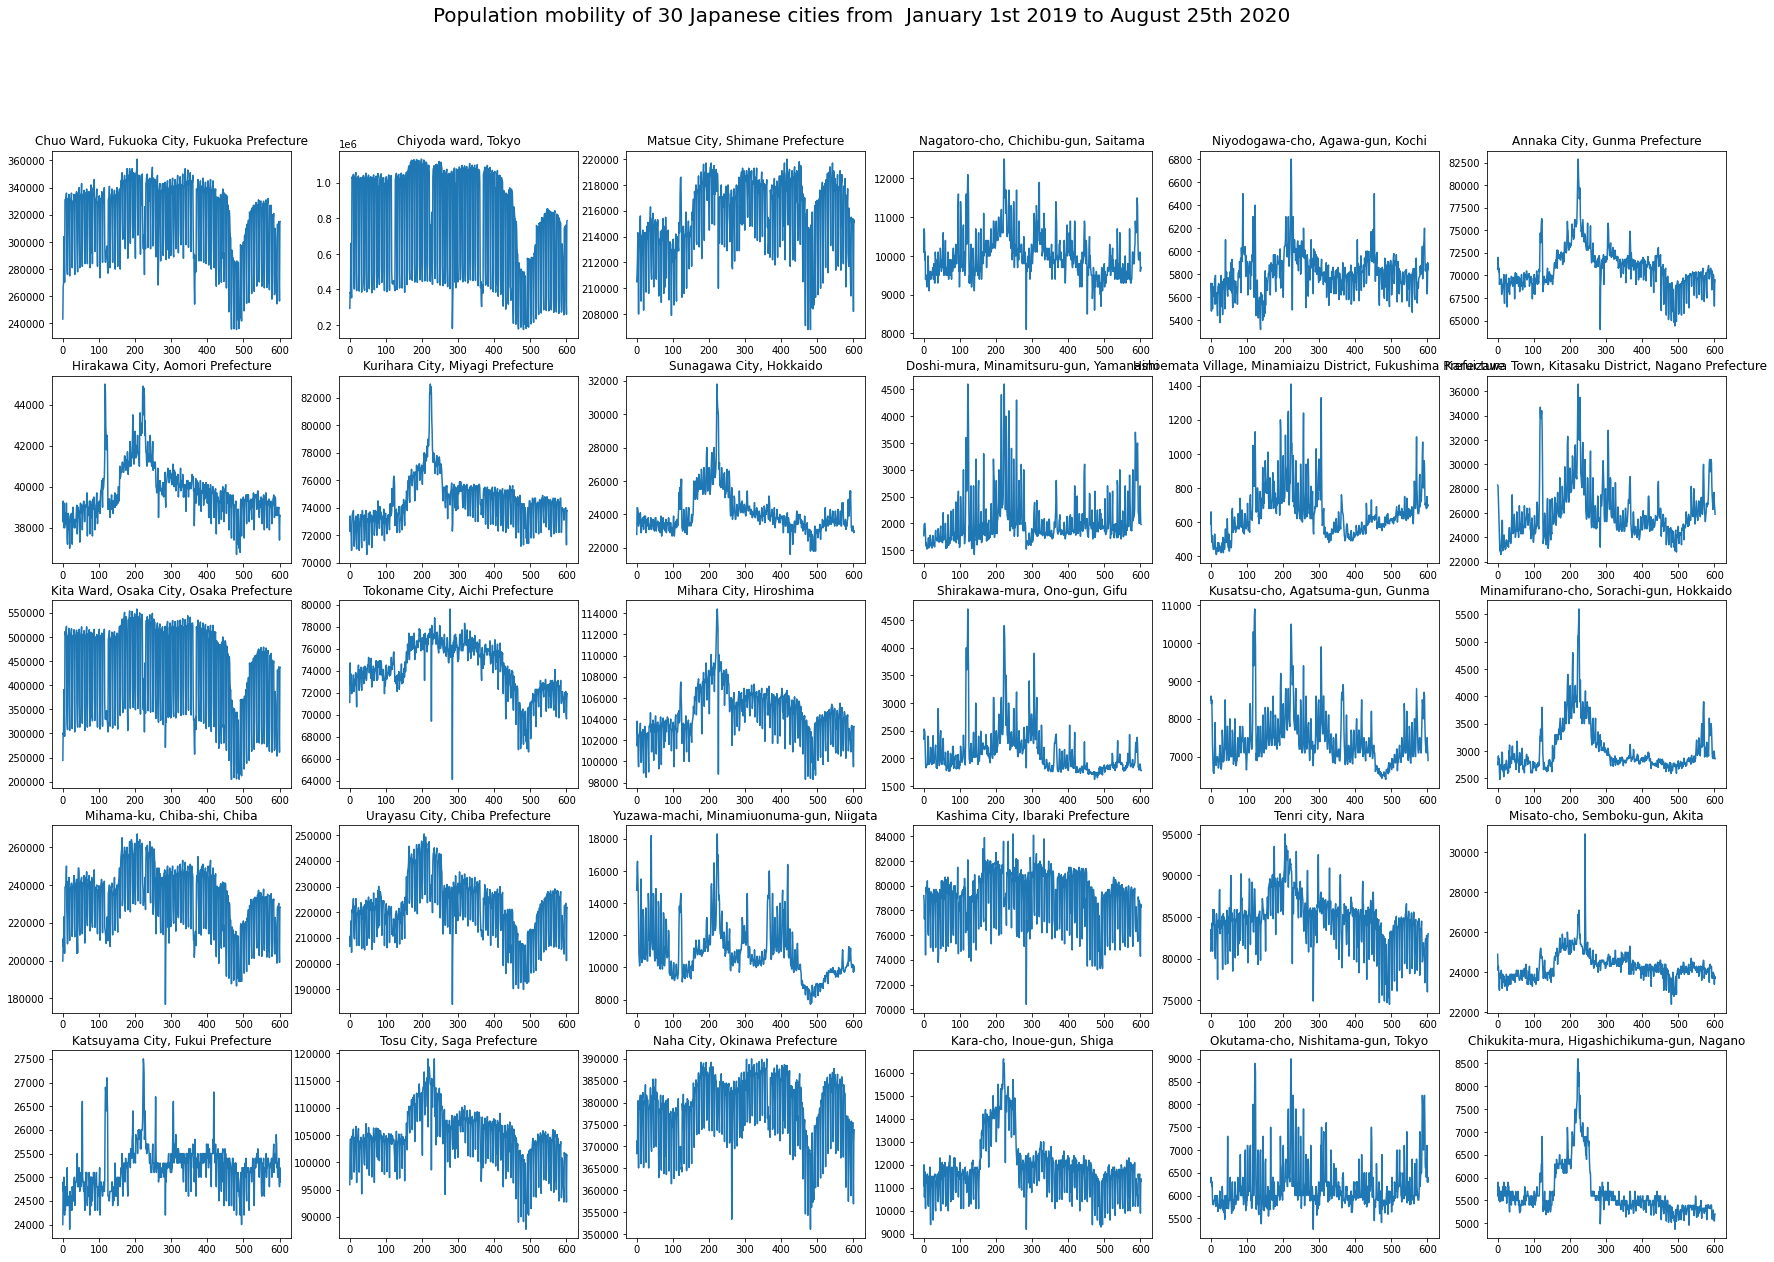

In [ ]:
fig = plt.figure(figsize=(30,20))
cities = list(target_mobility.columns)
cities_eng = ['Chuo Ward, Fukuoka City, Fukuoka Prefecture',
  'Chiyoda ward, Tokyo',
  'Matsue City, Shimane Prefecture',
  'Nagatoro-cho, Chichibu-gun, Saitama',
  'Niyodogawa-cho, Agawa-gun, Kochi',
  'Annaka City, Gunma Prefecture',
  'Hirakawa City, Aomori Prefecture',
  "Kurihara City, Miyagi Prefecture",
  'Sunagawa City, Hokkaido',
  'Doshi-mura, Minamitsuru-gun, Yamanashi',
  'Hinoemata Village, Minamiaizu District, Fukushima Prefecture',
  'Karuizawa Town, Kitasaku District, Nagano Prefecture',
  'Kita Ward, Osaka City, Osaka Prefecture',
  'Tokoname City, Aichi Prefecture',
  'Mihara City, Hiroshima',
  'Shirakawa-mura, Ono-gun, Gifu',
  'Kusatsu-cho, Agatsuma-gun, Gunma',
  'Minamifurano-cho, Sorachi-gun, Hokkaido',
  'Mihama-ku, Chiba-shi, Chiba',
  'Urayasu City, Chiba Prefecture',
  'Yuzawa-machi, Minamiuonuma-gun, Niigata',
  'Kashima City, Ibaraki Prefecture',
  'Tenri city, Nara',
  'Misato-cho, Semboku-gun, Akita',
  'Katsuyama City, Fukui Prefecture',
  "Tosu City, Saga Prefecture",
  'Naha City, Okinawa Prefecture',
  'Kara-cho, Inoue-gun, Shiga',
  'Okutama-cho, Nishitama-gun, Tokyo',
  "Chikukita-mura, Higashichikuma-gun, Nagano"]
# for c,num in zip(cities, range(1,30)):
#     df0=target_mobility[[c]]
#     ax = fig.add_subplot(5,6,num)
#     ax.plot(list(target_mobility.index), list(df0.iloc[:,0]))
#     ax.set_title(c)

# plt.tight_layout()
# plt.show()
import matplotlib.gridspec as gridspec
# fig = plt.figure(10,6)

gs1 = gridspec.GridSpec(5, 6)

axs = []
for c, num in zip(cities_eng, range(30)):
    df0=target_mobility.iloc[:,num-1]
    axs.append(fig.add_subplot(gs1[num - 1]))
    axs[-1].plot(list(df0))
    axs[-1].set_title(cities_eng[num-1])

plt.suptitle('Population mobility of 30 Japanese cities from  January 1st 2019 to August 25th 2020',fontsize=20)
plt.savefig('/content/drive/My Drive/or_data/summary_subplot_1.png')
#plt.title('Population mobility of 30 Japanese cities from  January 1st 2019 to August 25th 2020')
plt.show()



# figure, ax = plt.subplots(5, 6)
# i=0
# for a in range(len(ax)): 
#     for b in range(len(ax[a])):
#         ax[a, b].plot(target_mobility[[cities[i]]].iloc[:,0])
#         subplot_title=(cities[i])
#         ax[a,b].set_title(subplot_title)
#         i=i+1

# figure.tight_layout()
# plt.show()

## Let's delve into the population mobility of '福岡県福岡市中央区' at first.
### Dataloading
#### Use a slide window of length 4.

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(target_mobility['福岡県福岡市中央区'].values.reshape(-1,1))

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.80)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

### Model

In [ ]:

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

### Training

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.09953
Epoch: 100, loss: 0.03602
Epoch: 200, loss: 0.03161
Epoch: 300, loss: 0.02989
Epoch: 400, loss: 0.02573
Epoch: 500, loss: 0.02133
Epoch: 600, loss: 0.02105
Epoch: 700, loss: 0.02092
Epoch: 800, loss: 0.02080
Epoch: 900, loss: 0.02066
Epoch: 1000, loss: 0.02041
Epoch: 1100, loss: 0.01989
Epoch: 1200, loss: 0.01907
Epoch: 1300, loss: 0.01827
Epoch: 1400, loss: 0.01800
Epoch: 1500, loss: 0.01791
Epoch: 1600, loss: 0.01785
Epoch: 1700, loss: 0.01780
Epoch: 1800, loss: 0.01772
Epoch: 1900, loss: 0.01761


### Testing

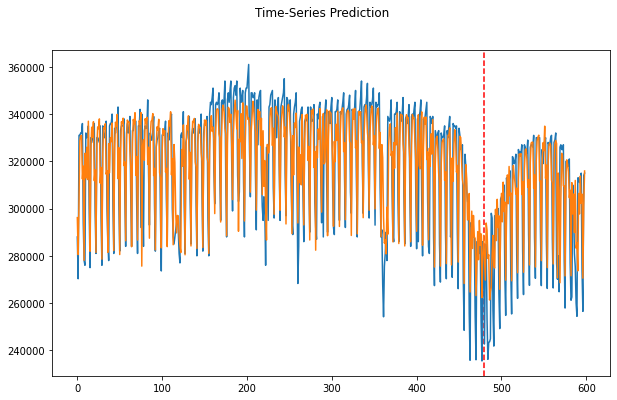

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

fig = plt.figure(1, figsize=(10,6))
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [ ]:
test_predict = data_predict[479:]
test_predict = test_predict.reshape(120,)
actual_data = target_mobility['福岡県福岡市中央区'][483:].values


In [ ]:
len(test_predict)

120

In [ ]:
np.mean((test_predict - actual_data)**2)**.5 

19643.717175051

### The RMSE for the prediction of 福岡県福岡市中央区's population mobility in the last 120 days(till August 25, 2020) is around 19643.

### Define a function to get the RMSE of the last 120 days' prediction and its population mobility prediction for the first half of September, 2020. 

In [ ]:
def RMSE_prediction_city(city_name, dataset):
    
    from numpy.random import seed
    seed(123)
    # Obtain the population mobility of the specified city.
    training_data = sc.fit_transform(target_mobility[city_name].values.reshape(-1,1))

    seq_length = 4
    x, y = sliding_windows(training_data, seq_length)
    # Create training and testing dataset by splitting the time series into 2 contiguous parts 
    # in approximate 80:20 ratio.
    train_size = int(len(y) * 0.80)
    test_size = len(y) - train_size

    dataX = Variable(torch.Tensor(np.array(x)))
    dataY = Variable(torch.Tensor(np.array(y)))

    trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
    trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

    testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
    testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))
    
    num_epochs = 2000
    learning_rate = 0.01

    input_size = 1
    hidden_size = 2
    num_layers = 1

    num_classes = 1

    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

    criterion = torch.nn.MSELoss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    #optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        optimizer.zero_grad()
    
        # obtain the loss function
        loss = criterion(outputs, trainY)
    
        loss.backward()
    
        optimizer.step()
        # if epoch % 100 == 0:
        #   print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
    
    lstm.eval()
    train_predict = lstm(dataX)

    data_predict = train_predict.data.numpy()

    data_predict = sc.inverse_transform(data_predict)

    test_predict = data_predict[479:]
    test_predict = test_predict.reshape(120,)
    actual_data = target_mobility[city_name][483:].values


    rmse = np.mean((test_predict - actual_data)**2)**.5 
    
    new_days_predict = []
    training_data_copy = training_data

    for i in range(21):
      dataX_new = Variable(torch.Tensor(np.array(training_data_copy[-4:].reshape(1,4,1))))
      new_predict = lstm(dataX_new)

      new_predict = new_predict.data.numpy()
      training_data_copy = np.append(training_data_copy, new_predict)
      new_predict_real = sc.inverse_transform(new_predict)
      new_days_predict.append(new_predict_real[0][0])

    final_predcition = new_days_predict[6:]

    
    return ({ 
            'rmse_LSTM':rmse,
            'prediction_LSTM': final_predcition
           })
    

In [ ]:
f = RMSE_prediction_city('福岡県福岡市中央区',target_mobility)
f

{'prediction_LSTM': [298093.7,
  308610.0,
  321496.97,
  325736.3,
  313209.75,
  296448.97,
  296755.5,
  308814.9,
  324959.25,
  326226.38,
  310889.97,
  297855.53,
  300498.78,
  314421.97,
  326844.25],
 'rmse_LSTM': 21490.0569156144}

- Get a list of dictionaries and each dictionary contains RMSE for the prediction of corresponding city and its prediction on the population mobility of first half of September. The list contains all 30 cities.

In [ ]:
import time
start_time = time.time()
RMSE_prediction_30_cities = [RMSE_prediction_city(x,target_mobility) for x in target_30_cities_list]

RMSE_prediction_30_cities
print("--- %s seconds ---" % (time.time() - start_time))

--- 163.41566371917725 seconds ---


### Transform the list of dictionaries to a dataframe and add a new column of city_name as the first column of the dataframe. 

In [ ]:
df_rmse_prediction_LSTM = pd.DataFrame(RMSE_prediction_30_cities)




idx = 0
new_col = target_30_cities_list  
df_rmse_prediction_LSTM.insert(loc=idx, column='city name', value=new_col)
df_rmse_prediction_LSTM

,city name,rmse_LSTM,prediction_LSTM
0,福岡県福岡市中央区,19861.829784,"[288267.1, 286540.56, 286134.78, 288392.12, 28..."
1,東京都千代田区,237927.888377,"[608579.0, 703384.9, 866504.75, 972394.94, 102..."
2,島根県松江市,2761.212854,"[215676.5, 215757.02, 215811.72, 215852.97, 21..."
3,埼玉県秩父郡長瀞町,336.107432,"[9966.73, 9981.075, 9993.046, 10002.965, 10011..."
4,高知県吾川郡仁淀川町,118.616217,"[5797.313, 5790.9062, 5786.4404, 5783.6367, 57..."
5,群馬県安中市,1341.040732,"[69493.55, 69524.48, 69549.6, 69574.516, 69596..."
6,青森県平川市,575.344007,"[38840.016, 38875.125, 38906.32, 38935.754, 38..."
7,宮城県栗原市,662.480818,"[72794.3, 72762.52, 72748.086, 72749.49, 72756..."
8,北海道砂川市,427.510247,"[23363.11, 23387.15, 23409.61, 23429.88, 23447..."
9,山梨県南都留郡道志村,332.036152,"[3021.0078, 3167.0525, 2921.9067, 2446.751, 20..."


### Save the results.

In [ ]:

df_rmse_prediction_LSTM.to_csv('/content/drive/My Drive/or_data/df_rmse_prediction_LSTM.csv',index=False,encoding='utf_8_sig')
df_rmse_prediction_LSTM.to_csv('~/liangyuwen/.csv',header=None)

In [ ]:
len(df_rmse_prediction_LSTM['prediction_LSTM'][0])

15

In [ ]:
df_rmse_prediction_LSTM['prediction_LSTM'][0]

[288267.1,
 286540.56,
 286134.78,
 288392.12,
 285909.5,
 282556.25,
 282604.75,
 281281.34,
 279471.34,
 279623.9,
 279917.5,
 279592.47,
 279878.1,
 280477.5,
 280508.8]